## Hypothesis Testing
* Null Hypothesis
* Alternate Hypothesis
* P-Value
* t-test
* Type I and Type II error
* Chi-squared Goodness of fit test 卡方擬合優度檢定
* Chi-sqaured Test of Independence 卡方獨立性檢定

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('input/sta-train.csv')
pd.set_option('max_columns', 82)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Types of Hypothesis Testing
* **1. T Test ( Student T test)**
* **2. Z Test**
* **3. ANOVA Test**
* **4. Chi-Square Test**

> Statistical Hypothesis, is a hypothesis that is testable on the basis of observing a process that is modeled via a set of random variables. A statistical hypothesis test is a method of statistical inference.

假設檢驗 Statistical Hypothesis，可以在觀察通過一組隨機變量建模的過程的基礎上進行檢驗。統計假設檢驗是一種統計推斷方法。

1. 一旦你有了原假設和備擇假設，你就可以選擇一個顯著性水平(α)。 顯著性水平是一個概率閾值，用於確定您何時拒絕原假設。
2. 在進行測試後，如果由於偶然性而得到與您觀察到的結果一樣極端的結果的概率低於顯著性水平，則您拒絕原假設以支持替代假設。
3. 這種將結果視為極端或更極端的概率稱為 p 值。

### P Value

>In statistical hypothesis testing, **the p-value or probability value** is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct. So now say that we have put a significance (α) = 0.05,This means that if we see a p-value of lesser than 0.05, we reject our Null and accept the Alternative to be true.The P value, or calculated probability, is the probability of finding the observed, or more extreme, results when the null hypothesis (H 0) of a study question is true — the definition of ‘extreme’ depends on how the hypothesis is being tested.If your P value is less than the chosen significance level then you reject the null hypothesis i.e. accept that your sample gives reasonable evidence to support the alternative hypothesis. It does NOT imply a “meaningful” or “important” difference; that is for you to decide when considering the real-world relevance of your result.

在統計假設檢驗中，p 值或概率值是在假設原假設正確的情況下，獲得至少與測試期間實際觀察到的結果一樣極端的測試結果的概率。所以現在說我們已經把顯著性 (α) = 0.05，這意味著如果我們看到小於 0.05 的 p 值，我們拒絕 Null 並接受 Alternative 為真，P 值或計算概率是當研究問題的原假設 (H 0) 為真時發現觀察到的或更極端的結果的概率——“極端”的定義取決於假設是如何被檢驗的 .如果您的 P 值小於所選的顯著性水平，那麼您拒絕原假設，即接受您的樣本提供了合理的證據來支持替代假設。 它並不意味著“有意義”或“重要”的區別； 這是由您在考慮結果的實際相關性時決定的。

- H0:- means difference between two sample is 0 (表示兩個樣本之間的差異為 0)
- H1:- mean difference between two sample is not 0 (表示兩個樣本的平均差不為 0)

# Gosset's (Student's) T-test (T 檢驗)

1. One Sample T Test 單樣本檢驗：單樣本 t 檢驗確定樣本均值是否在統計上不同於已知或假設的總體均值。
2. Two Sample T Test 獨立樣本檢驗：比較兩個獨立組的均值，以確定是否有統計證據表明相關總體均值存在顯著差異。
3. Paired Sampled T Test 配對抽樣檢驗：這是一個單變量測試，用於測試 2 個相關變量之間的顯著差異。

>A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features. It is mostly used when the data sets, like the set of data recorded as outcome from flipping a coin a 100 times, would follow a normal distribution and may have unknown variances. T test is used as a hypothesis testing tool, which allows testing of an assumption applicable to a population.

t 檢驗是一種推斷統計量，用於確定在某些特徵上可能相關的兩組均值之間是否存在顯著差異。它主要用於數據集（例如作為拋硬幣 100 次的結果記錄的數據集）遵循正態分佈並且可能具有未知方差的情況。 T 檢驗用作假設檢驗工具，它允許檢驗適用於總體的假設。

- T 檢驗是一種統計檢驗，用於確定數字數據樣本是否與總體有顯著差異，或者兩個樣本是否彼此不同。
- t 檢驗解決了樣本小於 30 的問題，並為我們提供了一種對較小樣本進行假設檢驗的方法。



In [13]:
from scipy.stats import ttest_1samp  # one t test
from scipy.stats import ttest_ind    # two t test
from scipy.stats import ttest_rel    # paired t test

In [14]:
data = pd.read_csv('input/sta-train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### One Sample T Test 單樣本檢驗

In [17]:
prices_mean = data['SalePrice'].mean()

tset, pval = ttest_1samp(data['SalePrice'], 180000)
print("p-values", pval)

# alpha value is 0.05 or 5%
if pval < 0.05:    
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p-values 0.6577784607522807
we are accepting null hypothesis


### Two Sampled T Test 獨立樣本檢驗
我們想檢查一樓每平方英尺的價格和二樓每平方英尺的價格之間是否存在關聯。

In [21]:
firstfloor_mean = data['1stFlrSF'].mean()
secondfloor_mean = data['2ndFlrSF'].mean()

print("Mean of cost of 1st floor per square foot :", firstfloor_mean)
print("Mean of cost of 2nd floor per sqaure foot :", secondfloor_mean)

firstfloor_std = data['1stFlrSF'].std()
secondfloor_std = data['2ndFlrSF'].std()

print("\nStandard Deviation of cost of first floor per square foot :", firstfloor_std)
print("Standard Deviation of cost of second floor per sqaure foot :", secondfloor_std)

ttest, pval = ttest_ind(data['1stFlrSF'], data['2ndFlrSF'])
print("\np-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

Mean of cost of 1st floor per square foot : 1162.626712328767
Mean of cost of 2nd floor per sqaure foot : 346.99246575342465

Standard Deviation of cost of first floor per square foot : 386.5877380410738
Standard Deviation of cost of second floor per sqaure foot : 436.5284358862591

p-value 0.0
we reject null hypothesis


### Paired T Test

它通常用於檢查兩個不同變量之間的時間差異。主要用於臨床行業進行測試和健康檢查

In [22]:
control = [8.0, 7.1, 6.5, 6.7, 7.2, 5.4, 4.7, 8.1, 6.3, 4.8]
treatment = [9.9, 7.9, 7.6, 6.8, 7.1, 9.9, 10.5, 9.7, 10.9, 8.2]

ttest, pval = ttest_rel(control, treatment)
print("P Value: ",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

P Value:  0.0055329408161001415
we reject null hypothesis


# Z test

- 您的樣本量大於 30。否則使用 t 檢驗。
- 數據點應該彼此獨立。 換句話說，一個數據點不相關或不影響另一個數據點。
- 您的數據應該是從總體中隨機選擇的，其中每個項目都有相同的機會被選中。
- 如果可能，樣本量應該相等。

* 1. Your sample size is greater than 30. Otherwise, use a t test.
* 2. Data points should be independent from each other. In other words, one data point isn’t related or doesn’t affect another data point.
* 3. Your data should be randomly selected from a population, where each item has an equal chance of being selected.
* 4. Sample sizes should be equal if at all possible.


**Are house prices in OldTown really different from the House Prices of Other Neighborhoods?**

**OldTown的房價和其他社區的房價真的有區別嗎？**


- R——老城區價格不同
Pvalue =< .05 (老城區的價格更低)

- a-老城區的價格是一樣的
Pvalue =< 0.5 (老城區的價格更高)

如果 P 值小於 0.05，那麼我們可以針對備擇假設拒絕我們的原假設。在假設其均值與所有房價的均值相同的情況下，得到舊城區房價的給定分佈的概率。

In [24]:
from statsmodels.stats import weightstats as stests

In [27]:
from statsmodels.stats.weightstats import ztest

z_statistic, p_value = ztest(x1 = data[data['Neighborhood'] == 'OldTown']['SalePrice'],
                             value = data['SalePrice'].mean())

print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{:.50f}'.format(p_value))

Z-statistic is :-10.639294263334575
P-value is :0.00000000000000000000000001956052602626001826532572


In [28]:
#----

### One Sample Z Test

The one-sample z-test is used to test whether the mean of a population is greater than, less than, or not equal to a specific value. Because the standard normal distribution is used to calculate critical values for the test, this test is often called the one-sample z-test.

In [ ]:
## We are testing whether the mean of house prices is 180000 or not

In [ ]:
from scipy import stats

ztest ,pval = stests.ztest(x1 = data['SalePrice'], x2=None, value=180000)
print("P Value :",float(pval))

if pval<0.05:
    print(" We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

### Two sample Z Test

In two sample z-test , similar to t-test here we are checking two independent data groups and deciding whether sample mean of two group is equal or not.

- Null Hypothesis: 零假設：一樓和二樓每平方英尺房屋的均價是相等的。
- Alternate Hypothesis: 替代假設：一樓和二樓每平方英尺房屋的均價並不相等。

In [ ]:
# Two Sample t test

firstfloor_mean = data['1stFlrSF'].mean()
secondfloor_mean = data['2ndFlrSF'].mean()

print("Mean of cost of first floor per square foot :", firstfloor_mean)
print("Mean of cost of second floor per sqaure foot :", secondfloor_mean)

firstfloor_std = data['1stFlrSF'].std()
secondfloor_std = data['2ndFlrSF'].std()

print("\nStandard Deviation of cost of first floor per square foot :", firstfloor_std)
print("Standard Deviation of cost of second floor per sqaure foot :", secondfloor_std)

ttest, pval = stests.ztest(data['1stFlrSF'], data['2ndFlrSF'], value = 0, alternative = 'smaller')
print("\np-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

### ANOVA (F-Test)

The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.

* **For example,**
if we wanted to test whether voter age differs based on some categorical variable like race, we have to compare the means of each level or group the variable. 

We could carry out a separate t-test for each pair of groups, but when you conduct many tests you increase the chances of false positives. The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.

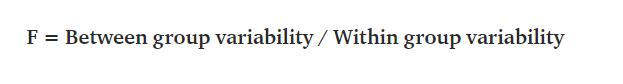

```Unlike the z and t-distributions, the F-distribution does not have any negative values because between and within-group variability are always positive due to squaring each deviation.```

### One Way ANOVA (F Test)

It tell whether two or more groups are similar or not based on their mean similarity and f-score.


### Checking significance  between Overall Condition and Sales Price of houses.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

F, p = stats.f_oneway(data['SalePrice'], data['OverallCond'])
print("p-value for significance is: ", p)

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


### Two Way F-test 

Two way F-test is extension of 1-way f-test, it is used when we have 2 independent variable and 2+ groups. 2-way F-test does not tell which variable is dominant. if we need to check individual significance then Post-hoc testing need to be performed.

# statistics-Comparative_Statistcs

## One Sample T test

We use a one sample T-test to determine whether our sample mean (observed average) is statistically significantly different to the population mean (expected average).

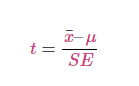



Where x¯ is the sample mean, μ is the population mean and the standard error is:
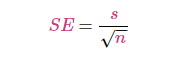

## Example

* Let’s say we want to calculate the resting systolic blood pressure of 20 first-year resident female doctors and compare it to the general public population mean of 120 mmHg.

The null hypothesis is that there is no significant difference between the blood pressure of the resident female doctors and the general population.

In [ ]:
import scipy
from scipy import stats

# sample of blood pressure of 20 female doctors
female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
                     111, 132, 149, 122, 139, 119, 136, 129, 126, 128]
stats.ttest_1samp(female_doctor_bps, 120)

Our t-statistic value is 4.512, and along with our degrees of freedom (n-1; 19) this can be used to calculate a p-value.

The p-value in this case is 0.0002, which is far less than the standard thresholds of 0.05 or 0.01, so we reject the null hypothesis and we can say there is a statistically significant difference between the resting systolic blood pressure of the resident female doctors and the general population.

## Two Sample T Test

A two sample T-test is used to compare the means of two separate samples.

It is calculated as follows (assuming equal variances)

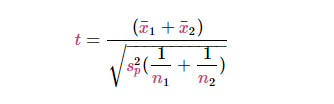

Where s2p is the pooled variance, calculated as follows:
  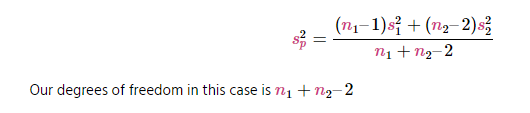  

## Example

* Let’s look at an example to compare the blood pressure of male consultant doctors with the junior resident female doctors we explored above.

Our null hypothesis in this case is that there is no statistically significant difference in the mean of male consulting doctors and junior resident female doctors.

* Scipy implements this as ttest_ind()

In [ ]:
female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
                     111, 132, 149, 122, 139, 119, 136, 129, 126, 128]

male_consultant_bps = [118, 115, 112, 120, 124, 130, 123, 110, 120, 121,
                      123, 125, 129, 130, 112, 117, 119, 120, 123, 128]

stats.ttest_ind(female_doctor_bps, male_consultant_bps)

Our t-statistic value is 3.514, and along with our degrees of freedom (38) this can be used to calculate a p-value.

The p-value in this case is 0.0012, which again is below than the standard thresholds of 0.05 or 0.01, so we reject the null hypothesis and we can say there is a statistically significant difference between the resting systolic blood pressure of the resident female doctors and the male consultant doctors.

## Paired T Test

Previously the observations in our two samples have been completely independent of one another.

Perhaps we want to compare two related samples, e.g. a before and after test, we might use a paired T-test.

This is calculated as follows:
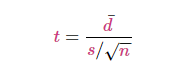
Where d¯ is the average difference between the paired samples. The degrees of freedom is n−1.

## Example

* We will measure the amount of sleep got by patients before and after taking soporific drugs to help them sleep.

* The null hypothesis is that the soporific drug has no effect on the sleep duration of the patients.

* Scipy implements the paired t-test as ttest_rel()

In [ ]:
control = [8.0, 7.1, 6.5, 6.7, 7.2, 5.4, 4.7, 8.1, 6.3, 4.8]
treatment = [9.9, 7.9, 7.6, 6.8, 7.1, 9.9, 10.5, 9.7, 10.9, 8.2]

stats.ttest_rel(control, treatment)

Our t-statistic value is -3.624, and along with our degrees of freedom (9) this can be used to calculate a p-value.

The p-value is 0.0055, which again is below than the standard thresholds of 0.05 or 0.01, so we reject the null hypothesis and we can say there is a statistically significant difference in sleep duration caused by the soporific drug.

## Analysis of Variance (ANOVA)

* ANOVA is used to compare the means of three or more samples.

* While you could do multiple T-tests, as you increase the numbers of T-tests you do, you are more likely to encounter a Type I error. If you have a p value of 0.05 for each T-test, once you have run three T-tests, your p is effectively 0.143. ANOVA controls for this error such that the Type I error rate remains at 5%.

```An ANOVA will provide an F-statistic which can, along with degrees of freedom, be used to calculate a p value.```

* ANOVAs assume independence of observations, homogeneity of variances and normally distributed observations within groups.

* This is implemented in scipy by as f_oneway().

## Example

We will use R’s Plant Growth Data Set for our ANOVA.

The null hypothesis is that there is no difference between the means of the weights of dried plants under control and 2 different treatment conditions.

In [ ]:
ctrl = [4.17, 5.58, 5.18, 6.11, 4.5, 4.61, 5.17, 4.53, 5.33, 5.14]
trt1 = [4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69]
trt2 = [6.31, 5.12, 5.54, 5.5, 5.37, 5.29, 4.92, 6.15, 5.8, 5.26]

stats.f_oneway(ctrl, trt1, trt2)

We report this using the degrees of freedom (between), which is k-1, and the degrees of freedom within, which is N-k.

So we report the result of our ANOVA as (F(2, 27), p=0.016).

As p < 0.05, we can reject the null hypothesis that there is no difference between the means of the weights of dried plants under control and each of the 2 different treatment conditions.

### Chi Square Test

The term "chi-squared test," also written as χ² test, refers to certain types of statistical hypothesis tests that are valid to perform when the test statistic is chi-squared distributed under the null hypothesis. Often, however, the term is used to refer to Pearson's chi-squared test and variants thereof.

***A chi-squared goodness of fit tests whether the distribution of sample categorical data matches an expected distribution.***

For example, 
* *you could use a chi-squared goodness-of-fit test to check whether the race demographics of members at your church or school match that of the entire population of your country*.
* *you could check whether the computer browser preferences of your friends match those of Internet uses as a whole.*

* *When working with categorical data the values the observations themselves aren't of much use for statistical testing because categories like "male", "female," and "other" have no mathematical meaning.*

#### Let's generate some fake demographic data for U.S. and Minnesota and walk through the chi-square goodness of fit test to check whether they are different:



## Chi-Squared Goodness of fit Test

In [ ]:
import pandas as pd
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)          

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)

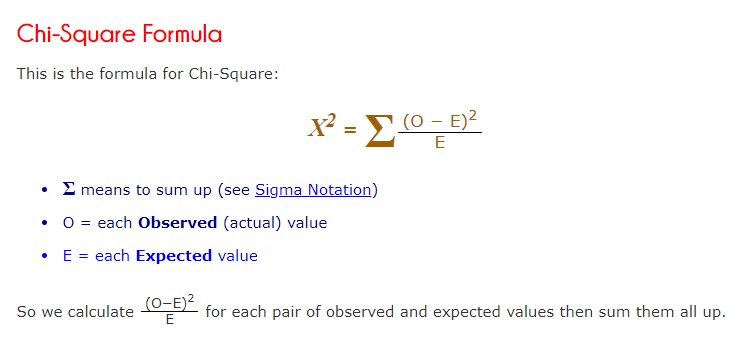

* **Good Fit**: If the significance value that is p-value associated with chi-square statistics is 0.002, there is very strong evidence of rejecting the null hypothesis of no fit. It means good fit.

In [ ]:
observed = minnesota_table

national_ratios = national_table/len(national)  # Get population ratios

expected = national_ratios * len(minnesota)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

## Chi-Sqaured Test of Independence

### Effect of LandContour on SalePrice

In [ ]:
# Let's test if knowing LandContour which is the overall flatness of the property tells us anything about the price

# For this let's divide the SalePrice in three buckets - High, Medium, Low

import scipy.stats as sp
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2, pval, dof, expected = sp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return


price = pd.qcut(data['SalePrice'], 3, labels = ['High', 'Medium', 'Low'])
compute_freq_chi2(data.LandContour, price)

* The low p-value tells us that the two variables aren't independent and knowing the LandContour of a house does tells us something about its SalePrice.

**The frequency distribution reflects this**
* Houses that are Near Flat/Level(Lvl) have an equal distribution of SalePrice.
* On the other hand houses that are at a Hillside i.e., Significant slope from side to side (HLS) have almost thrice as much houses with low price than high prices.

## Degree of freedom 補充：自由度

>In statistics, the number of degrees of freedom is the number of values in the final calculation of a statistic that are free to vary. The number of independent ways by which a dynamic system can move, without violating any constraint imposed on it, is called number of degrees of freedom.So if a data set has 10 values, the sum of the 10 values must equal the mean x 10. If the mean of the 10 values is 3.5 (you could pick any number), this constraint requires that the sum of the 10 values must equal 10 x 3.5 = 35.With that constraint, the first value in the data set is free to vary.Whatever value it is, it’s still possible for the sum of all 10 numbers to have a value of 35. The second value is also free to vary, because whatever value you choose, it still allows for the possibility that the sum of all the values is 35.


在統計學中，自由度的數量是統計量的最終計算中可以自由變化的值的數量。動態系統在不違反任何約束的情況下可以移動的獨立方式的數量稱為自由度數。因此，如果數據集有 10 個值，則 10 個值的總和必須等於平均值 x 10。如果 10 個值的平均值為 3.5（您可以選擇任何數字），則此約束要求 10 個值的總和必須等於 10 x 3.5 = 35。有了這個約束，數據集中的第一個值可以自由變化。無論它是什麼值，所有 10 個數字的總和仍有可能具有 35 的值。第二個值也可以自由變化，因為無論您選擇什麼值，它仍然允許所有值的總和是 35。

**計算正確的自由度數很重要，因為自由度數決定了您接受或拒絕假設的臨界值。因此，自由度有助於我們在其他測試中一般實現所需的置信水平或目標。**

## Numpy Statistical Functions - Z Score

### <center>Z Score</center>
## $$ Formula: \frac{(x - \mu)}{\sigma}$$</center>
<center><i> $x$ : value of the observation</i></center>
<center><i> $\mu$ : Mean</i></center>
<center><i> $\sigma$ : Standard Deviation</i></center>

In [1]:
import numpy as np
data = np.array([25,47,49,54,57,59,61,63,64,67,71,72,73,79, 230])
z_scores = (data - np.mean(data) ) / np.std(data)
z_scores

array([-1.04839729, -0.55131237, -0.50612283, -0.39314898, -0.32536468,
       -0.28017514, -0.2349856 , -0.18979606, -0.16720129, -0.09941698,
       -0.00903791,  0.01355686,  0.03615163,  0.17172025,  3.58353039])

In [2]:
from scipy import stats
z_scores = stats.zscore(data)
z_scores

array([-1.04839729, -0.55131237, -0.50612283, -0.39314898, -0.32536468,
       -0.28017514, -0.2349856 , -0.18979606, -0.16720129, -0.09941698,
       -0.00903791,  0.01355686,  0.03615163,  0.17172025,  3.58353039])

In [4]:
threshold = 3.0
z_scores_outliers = z_scores[(z_scores < -threshold) | (z_scores > threshold)]
print('z scores of outliers:',z_scores_outliers)
outliers = data[(z_scores < -threshold) | (z_scores > threshold)]
print('OUTLIERS:',outliers)

z scores of outliers: [3.58353039]
OUTLIERS: [230]


Example 2 (Impact on data size)

In [5]:
#create array with size of 100 and value=5
data2 = np.full(100,5)
data2

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [6]:
#modify array to have some other elements also
data2[96] = 15
data2[97] = 67
data2[98]= -32
data2[99] = 150

data2[35:45] =7
data2[57:77] =8
data2[80:85] =10

data2

array([  5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,
         5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,
         5,   5,   5,   5,   5,   5,   5,   5,   5,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   5,   5,   5,   5,   5,   5,   5,
         5,   5,   5,   5,   5,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   5,
         5,   5,  10,  10,  10,  10,  10,   5,   5,   5,   5,   5,   5,
         5,   5,   5,   5,   5,  15,  67, -32, 150])

In [7]:
z_scores = stats.zscore(data2)
z_scores

array([-0.17719047, -0.17719047, -0.17719047, -0.17719047, -0.17719047,
       -0.17719047, -0.17719047, -0.17719047, -0.17719047, -0.17719047,
       -0.17719047, -0.17719047, -0.17719047, -0.17719047, -0.17719047,
       -0.17719047, -0.17719047, -0.17719047, -0.17719047, -0.17719047,
       -0.17719047, -0.17719047, -0.17719047, -0.17719047, -0.17719047,
       -0.17719047, -0.17719047, -0.17719047, -0.17719047, -0.17719047,
       -0.17719047, -0.17719047, -0.17719047, -0.17719047, -0.17719047,
       -0.05284628, -0.05284628, -0.05284628, -0.05284628, -0.05284628,
       -0.05284628, -0.05284628, -0.05284628, -0.05284628, -0.05284628,
       -0.17719047, -0.17719047, -0.17719047, -0.17719047, -0.17719047,
       -0.17719047, -0.17719047, -0.17719047, -0.17719047, -0.17719047,
       -0.17719047, -0.17719047,  0.00932581,  0.00932581,  0.00932581,
        0.00932581,  0.00932581,  0.00932581,  0.00932581,  0.00932581,
        0.00932581,  0.00932581,  0.00932581,  0.00932581,  0.00

In [8]:
threshold =2.0

In [9]:
z_scores_outliers = z_scores[(z_scores < -threshold) | (z_scores > threshold)]
print('z scores of outliers:',z_scores_outliers)
outliers = data2[(z_scores < -threshold) | (z_scores > threshold)]
print('OUTLIERS:',outliers)

z scores of outliers: [ 3.67747932 -2.47755792  8.83776307]
OUTLIERS: [ 67 -32 150]


Z-Score method have detected 3 outliers [67, -32, 150]

Suppose let us keep only few data points (i.e only few repetitions) from the input

In [10]:
#let us reduce the size of data from 100 to just 11 by having only 2 repetitions
data3  = np.array([-32,5,5,7,7,8,8,10,15,67,150])

In [11]:
z_scores = stats.zscore(data3)
z_scores

array([-1.1986088 , -0.38825368, -0.38825368, -0.3444507 , -0.3444507 ,
       -0.32254921, -0.32254921, -0.27874623, -0.16923878,  0.96963868,
        2.78746232])

In [12]:
threshold =2.0

In [13]:
z_scores_outliers = z_scores[(z_scores < -threshold) | (z_scores > threshold)]
print('z scores of outliers:',z_scores_outliers)
outliers = data3[(z_scores < -threshold) | (z_scores > threshold)]
print('OUTLIERS:',outliers)

z scores of outliers: [2.78746232]
OUTLIERS: [150]
